In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data Set

In [2]:
file = "sentimentdataset.csv"
df = pd.read_csv(file, sep= ',')
df

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [3]:
def null_count():
    return pd.DataFrame({'features': df.columns,
                'dtypes': df.dtypes.values,
                'NaN count': df.isnull().sum().values,
                'NaN percentage': df.isnull().sum().values/df.shape[0]}).style.background_gradient(cmap='cool',low=0.1,high=0.01)
null_count()

,features,dtypes,NaN count,NaN percentage
0,Unnamed: 0.1,int64,0,0.000000
1,Unnamed: 0,int64,0,0.000000
2,Text,object,0,0.000000
3,Sentiment,object,0,0.000000
4,Timestamp,object,0,0.000000
5,User,object,0,0.000000
6,Platform,object,0,0.000000
7,Hashtags,object,0,0.000000
8,Retweets,float64,0,0.000000
9,Likes,float64,0,0.000000


In [4]:
df.duplicated().sum()

0

# Data Cleaning

In [5]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
df

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [6]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Text       732 non-null    object        
 1   Sentiment  732 non-null    object        
 2   Timestamp  732 non-null    datetime64[ns]
 3   User       732 non-null    object        
 4   Platform   732 non-null    object        
 5   Hashtags   732 non-null    object        
 6   Retweets   732 non-null    float64       
 7   Likes      732 non-null    float64       
 8   Country    732 non-null    object        
 9   Year       732 non-null    int64         
 10  Month      732 non-null    int64         
 11  Day        732 non-null    int64         
 12  Hour       732 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 74.5+ KB


In [8]:
import re

def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Hapus URL
    text = re.sub(r'@\w+', '', text)  # Hapus sebutan
    text = re.sub(r'#\w+', '', text)  # Hapus hashtag
    text = re.sub(r'\W', ' ', text)  # Hapus karakter khusus
    text = text.lower()  # Ubah menjadi huruf kecil
    return text

df['Cleaned_Text'] = df['Text'].apply(clean_text)


In [9]:
df['Platform'].value_counts()

 Instagram     258
 Facebook      231
 Twitter       128
 Twitter       115
Name: Platform, dtype: int64

In [10]:
df['Platform'] = df['Platform'].str.strip()

In [11]:
df['Country'].value_counts()

 USA               59
 USA               55
 UK                49
 Canada            44
 Australia         41
                   ..
 Netherlands        1
 USA                1
 Germany            1
 France             1
 USA                1
Name: Country, Length: 115, dtype: int64

In [12]:
df['Country'] = df['Country'].str.strip()

In [13]:
df.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Cleaned_Text
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,enjoying a beautiful day at the park ...
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,traffic was terrible this morning ...
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,just finished an amazing workout ...
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,excited about the upcoming weekend getaway ...
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,trying out a new recipe for dinner tonight ...


# Data Analysis

In [14]:
print(df.describe())

         Retweets       Likes         Year       Month         Day        Hour
count  732.000000  732.000000   732.000000  732.000000  732.000000  732.000000
mean    21.508197   42.901639  2020.471311    6.122951   15.497268   15.521858
std      7.061286   14.089848     2.802285    3.411763    8.474553    4.113414
min      5.000000   10.000000  2010.000000    1.000000    1.000000    0.000000
25%     17.750000   34.750000  2019.000000    3.000000    9.000000   13.000000
50%     22.000000   43.000000  2021.000000    6.000000   15.000000   16.000000
75%     25.000000   50.000000  2023.000000    9.000000   22.000000   19.000000
max     40.000000   80.000000  2023.000000   12.000000   31.000000   23.000000


In [15]:
#Sentiment Analysis
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

 Positive           44
 Joy                42
 Excitement         32
 Neutral            14
 Contentment        14
                    ..
 Adrenaline          1
 Harmony             1
 ArtisticBurst       1
 Radiance            1
 Elegance            1
Name: Sentiment, Length: 279, dtype: int64


In [16]:
#Number of Posts per Platform
platform_counts = df['Platform'].value_counts()
print(platform_counts)

Instagram    258
Twitter      243
Facebook     231
Name: Platform, dtype: int64


In [17]:
#Engagement Analysis
avg_engagement = df.groupby('Sentiment')[['Retweets', 'Likes']].mean()
print(avg_engagement)

                    Retweets      Likes
Sentiment                              
 Acceptance        17.333333  35.000000
 Acceptance        16.800000  33.600000
 Accomplishment    26.000000  51.666667
 Admiration        22.000000  45.000000
 Admiration        20.000000  40.000000
...                      ...        ...
 Wonder            40.000000  80.000000
 Wonder            40.000000  80.000000
 Wonderment        35.000000  70.000000
 Yearning          10.000000  20.000000
 Zest              15.500000  31.000000

[279 rows x 2 columns]


# Sentiment Analysis

Simplifying Sentiment Categories Using VADER

In [29]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Anwar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anwar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anwar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
#Calculates the VADER sentiment score

analyzer = SentimentIntensityAnalyzer()

df['Vader_Score'] = df['Cleaned_Text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

#Determines sentiment based on VADER scores
df['Sentiment'] = df['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

print(df[['Cleaned_Text', 'Vader_Score', 'Sentiment']].head())

                                        Cleaned_Text  Vader_Score Sentiment
0   enjoying a beautiful day at the park         ...       0.8074  positive
1   traffic was terrible this morning            ...      -0.4767  negative
2   just finished an amazing workout             ...       0.5859  positive
3   excited about the upcoming weekend getaway   ...       0.3400  positive
4   trying out a new recipe for dinner tonight   ...       0.0000   neutral


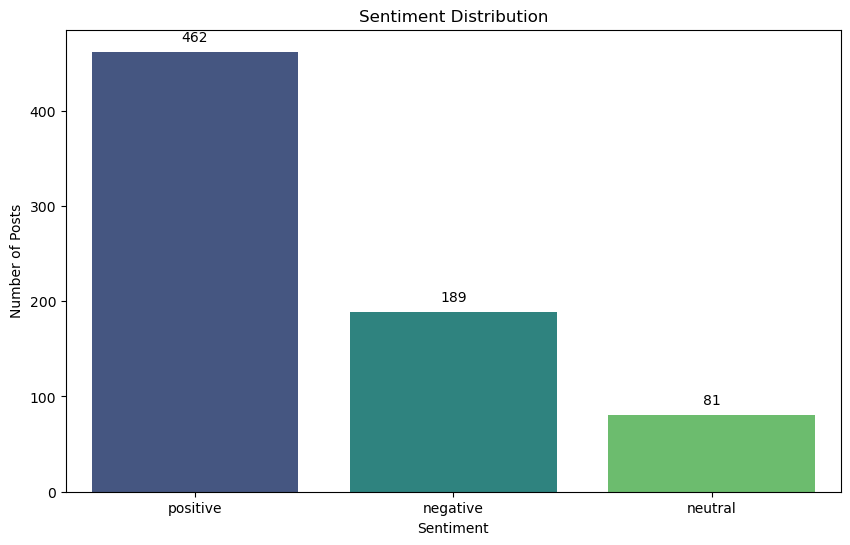

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Sentiment', data=df, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.show()


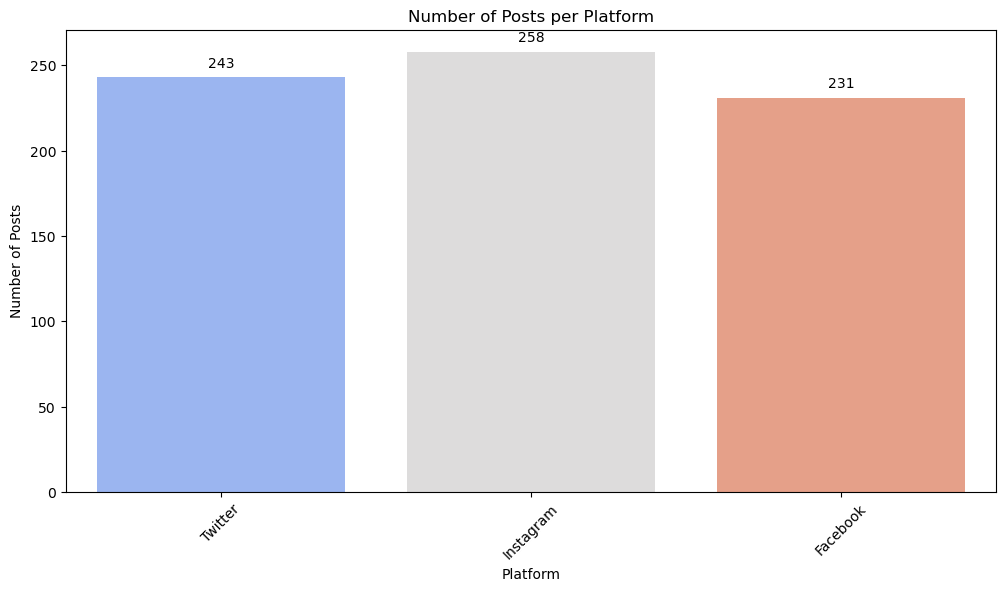

In [37]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Platform', data=df, palette='coolwarm')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Number of Posts per Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.show()


C:\Users\Anwar\AppData\Local\Temp\ipykernel_11796\1595973615.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_retweets_likes = df.groupby('Sentiment').mean()[['Retweets', 'Likes']]


<Figure size 1200x600 with 0 Axes>

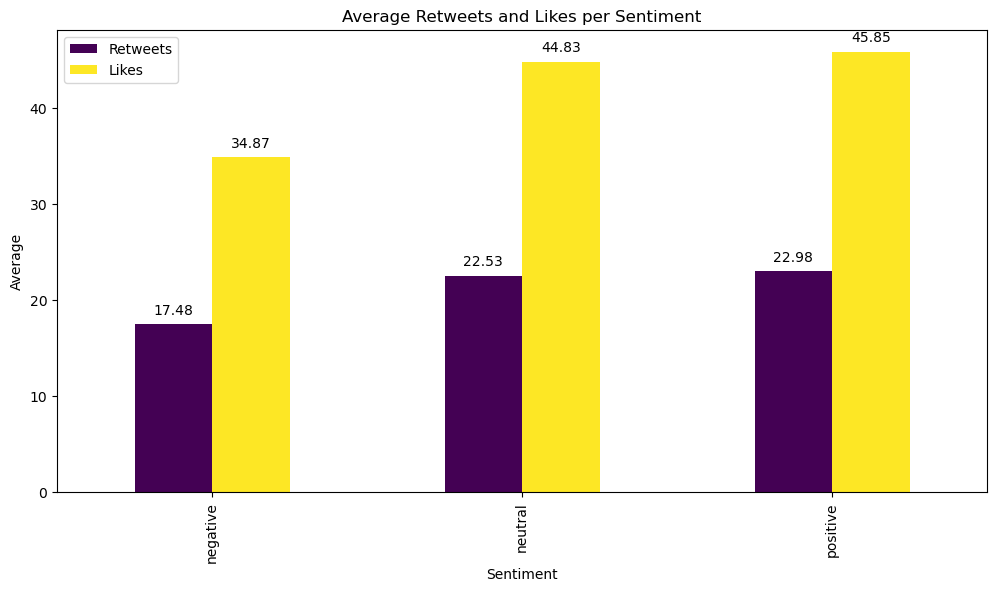

In [39]:
plt.figure(figsize=(12, 6))
avg_retweets_likes = df.groupby('Sentiment').mean()[['Retweets', 'Likes']]
ax = avg_retweets_likes.plot(kind='bar', figsize=(12, 6), colormap='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Average Retweets and Likes per Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average')
plt.show()


C:\Users\Anwar\AppData\Local\Temp\ipykernel_11796\3927318508.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Hour').mean()['Likes'].plot(kind='line', marker='o', color='blue')


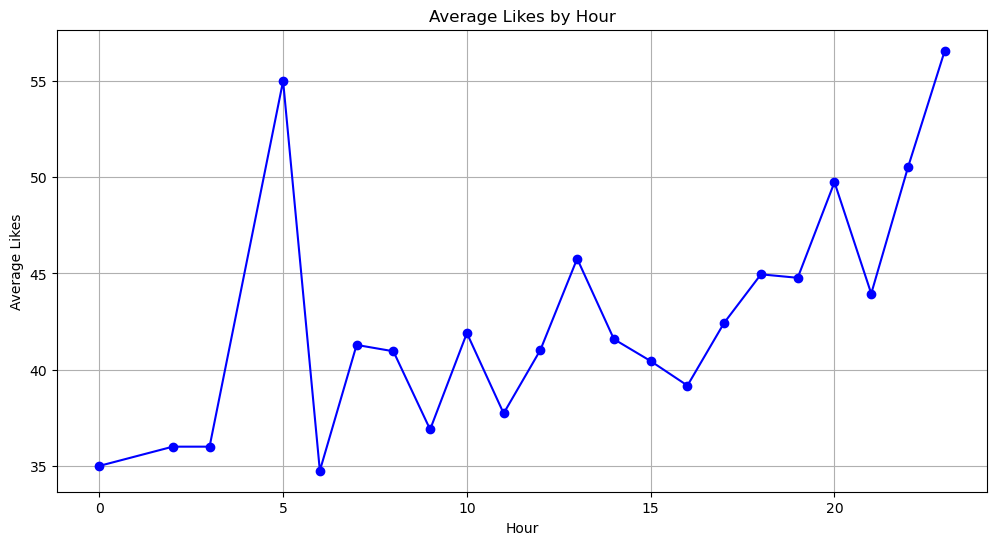

In [42]:
# Plot average Likes by Hour
plt.figure(figsize=(12, 6))
df.groupby('Hour').mean()['Likes'].plot(kind='line', marker='o', color='blue')
plt.title('Average Likes by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Likes')
plt.grid(True)
plt.show()


C:\Users\Anwar\AppData\Local\Temp\ipykernel_11796\3474825068.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_engagement_country = df.groupby('Country').mean()[['Retweets', 'Likes']]


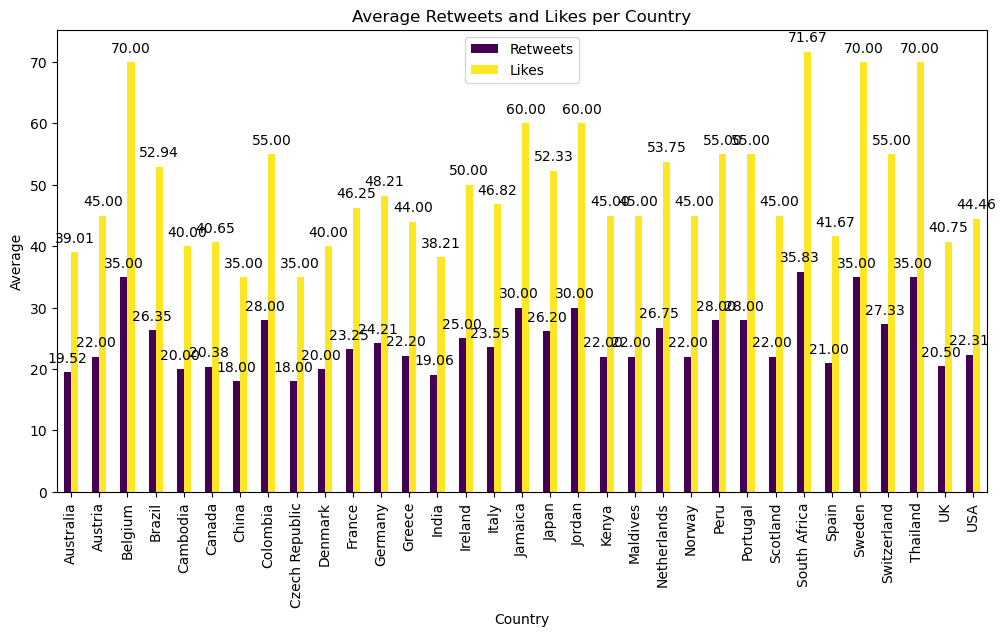

In [43]:
# Grouping by Country and calculating average Retweets and Likes
avg_engagement_country = df.groupby('Country').mean()[['Retweets', 'Likes']]

# Plot bar
ax = avg_engagement_country.plot(kind='bar', figsize=(12, 6), colormap='viridis')

# Add a number above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Average Retweets and Likes per Country')
plt.xlabel('Country')
plt.ylabel('Average')
plt.show()

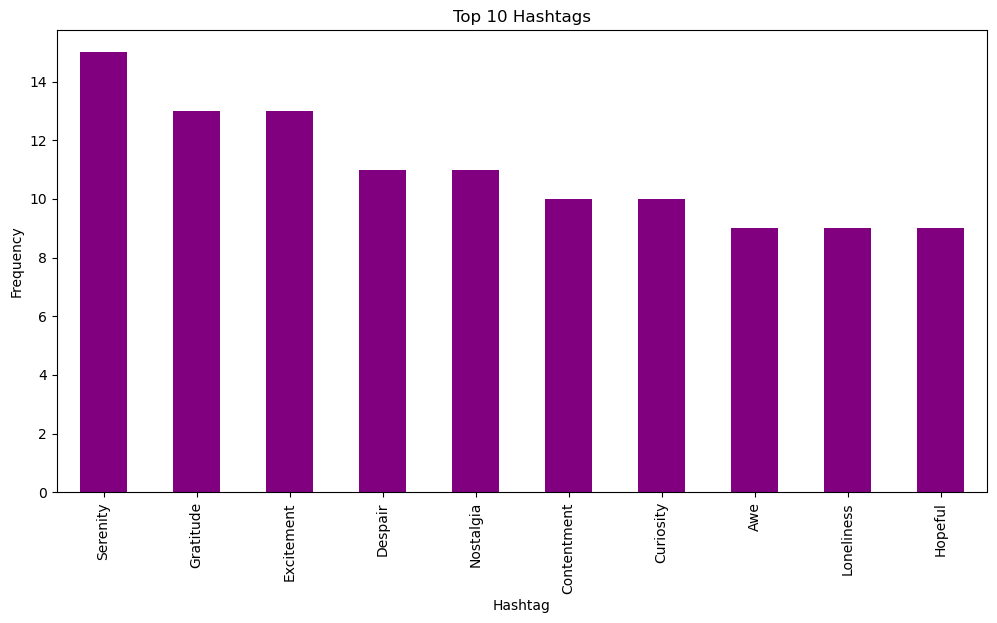

In [44]:
# Calculating hashtag frequency
df['Hashtags'] = df['Hashtags'].astype(str)
hashtags = df['Hashtags'].str.split('#', expand=True).stack().str.strip().value_counts()
hashtags = hashtags[hashtags.index != '']  # Hapus entry kosong

# Hashtag frequency plot
plt.figure(figsize=(12, 6))
hashtags.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.show()


In [45]:
# Filter data containing the hashtag #serenity
serenity_data = df[df['Hashtags'].str.contains('#serenity', case=False, na=False)]

# Calculate the average of Likes and Retweets
avg_serenity_engagement = serenity_data[['Retweets', 'Likes']].mean()
print(f'Average Retweets for #serenity: {avg_serenity_engagement["Retweets"]}')
print(f'Average Likes for #serenity: {avg_serenity_engagement["Likes"]}')


Average Retweets for #serenity: 21.133333333333333
Average Likes for #serenity: 42.4


In [46]:
# Calculate the average Likes and Retweets for the overall data
avg_total_engagement = df[['Retweets', 'Likes']].mean()
print(f'Average Retweets overall: {avg_total_engagement["Retweets"]}')
print(f'Average Likes overall: {avg_total_engagement["Likes"]}')

# comparison
print(f'Average Retweets for #serenity is {"higher" if avg_serenity_engagement["Retweets"] > avg_total_engagement["Retweets"] else "lower"} than overall.')
print(f'Average Likes for #serenity is {"higher" if avg_serenity_engagement["Likes"] > avg_total_engagement["Likes"] else "lower"} than overall.')


Average Retweets overall: 21.508196721311474
Average Likes overall: 42.90163934426229
Average Retweets for #serenity is lower than overall.
Average Likes for #serenity is lower than overall.


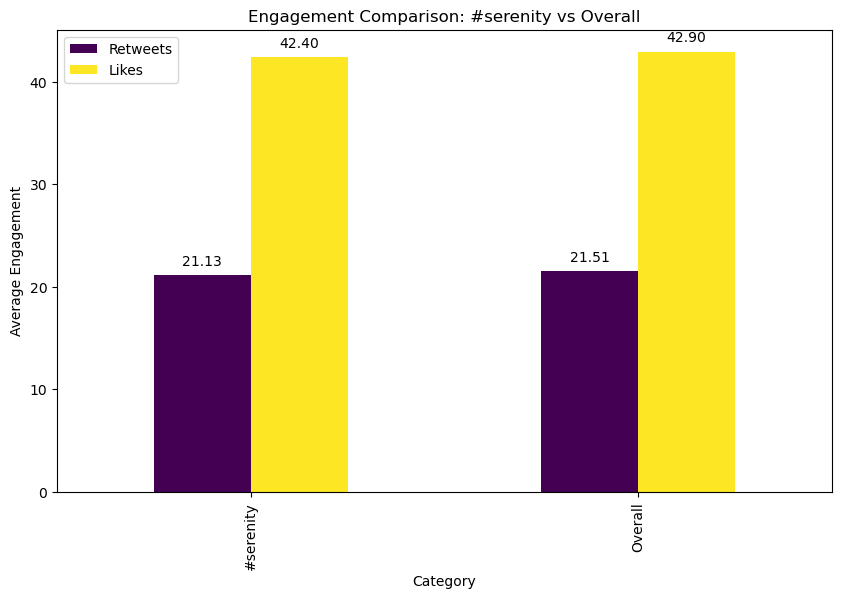

In [50]:
import matplotlib.pyplot as plt

# Data for visualization
engagement_comparison = pd.DataFrame({
    'Category': ['#serenity', 'Overall'],
    'Retweets': [avg_serenity_engagement['Retweets'], avg_total_engagement['Retweets']],
    'Likes': [avg_serenity_engagement['Likes'], avg_total_engagement['Likes']]
})

# Plot
comparison = engagement_comparison.set_index('Category')
ax = comparison.plot(kind='bar', figsize=(10, 6), colormap='viridis')

# Add a number above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Engagement Comparison: #serenity vs Overall')
plt.xlabel('Category')
plt.ylabel('Average Engagement')
plt.show()